['albedo', 'diffuse', 'roughness', 'emission']
im (320, 640, 3) 1.0 0.08235294
alnedo (320, 640, 3) 0.98437786 0.009310006
diffuse (320, 640, 3) 0.97756165 0.0
roughness (320, 640) 1.0 0.2779926
emission (320, 640, 3) 18.733995 0.0


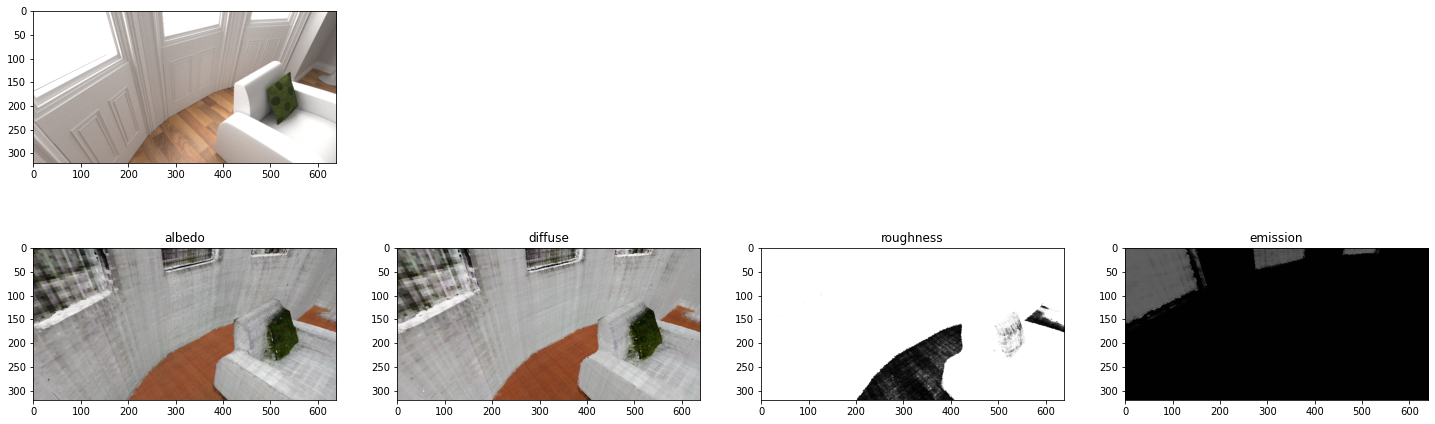

In [29]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
# npz_root = Path('../../data/indoor_synthetic/RESULTS_milo/UCSD-Bathroom-2000/train')
# im_root = Path('../../data/indoor_synthetic/bathroom/train/Image')
npz_root = Path('../../data/indoor_synthetic/RESULTS_milo/UCSD-Livingroom-2000/train')
im_root = Path('../../data/indoor_synthetic/livingroom/train/Image')
frame_id = 0
npz_path = npz_root / ('%06d.npz'%frame_id)
assert npz_path.exists(), 'npz_path: %s does not exist'%npz_path
im_path = im_root / ('%03d_0001.png'%frame_id)
assert im_path.exists(), 'im_path: %s does not exist'%im_path

xx = np.load(npz_path)
print(list(xx.keys()))

im = plt.imread(im_path)
print('im', im.shape, np.amax(im), np.amin(im))
albedo = xx['albedo'].transpose(1,2,0)[:, :, ::-1]
print('alnedo', albedo.shape, np.amax(albedo), np.amin(albedo))
diffuse = xx['diffuse'].transpose(1,2,0)[:, :, ::-1]
print('diffuse', diffuse.shape, np.amax(diffuse), np.amin(diffuse))
roughness = xx['roughness'].transpose(1,2,0).squeeze()
print('roughness', roughness.shape, np.amax(roughness), np.amin(roughness))
emission = xx['emission'].transpose(1,2,0)[:, :, ::-1]
print('emission', emission.shape, np.amax(emission), np.amin(emission))


plt.figure(figsize=(25, 8))
plt.subplot(2, 4, 1)
plt.imshow(im)
ax = plt.subplot(2, 4, 5)
plt.imshow(albedo)
ax.set_title('albedo')
ax = plt.subplot(2, 4, 6)
plt.imshow(diffuse)
ax.set_title('diffuse')
ax = plt.subplot(2, 4, 7)
plt.imshow(roughness, cmap='gray')
ax.set_title('roughness')
ax = plt.subplot(2, 4, 8)
plt.imshow(emission**(1./2.2) / 10.)
ax.set_title('emission')

plt.show()
